In [ ]:
# Importing a library dor spliting the data for train, validation, and testing
import os
import splitfolders

In [ ]:
# Creating the folder for training, validation, and testing
os.mkdir('E:/output')
os.mkdir('E:/output/train')
os.mkdir('E:/output/val')
os.mkdir('E:/output/test')

In [ ]:
# Source of the data
source_file='E:/Experiment'

In [ ]:
# Spliting the data based on 80-10-10 spliting ratio
splitfolders.ratio(source_file, output='E:/output', seed=1337, ratio=(.8, .1, .1), group_prefix=None)

In [ ]:
!unrar x "/content/drive/MyDrive/Hawi/output.rar" "/content/drive/MyDrive/Hawi/"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/Hawi/output.rar

Creating    /content/drive/MyDrive/Hawi/output                        OK
Creating    /content/drive/MyDrive/Hawi/output/test                   OK
Creating    /content/drive/MyDrive/Hawi/output/test/Healthy           OK
Extracting  /content/drive/MyDrive/Hawi/output/test/Healthy/loh(18).JPG       0%  OK 
Extracting  /content/drive/MyDrive/Hawi/output/test/Healthy/loh(22).JPG       0%  OK 
Extracting  /content/drive/MyDrive/Hawi/output/test/Healthy/loh(23).JPG       0%  1%  OK 
Extracting  /content/drive/MyDrive/Hawi/output/test/Healthy/loh(3).JPG       1%  OK 
Extracting  /content/drive/MyDrive/Hawi/output/test/Healthy/loh(47).JPG       1%  OK 
Extracting  /content/drive/MyDrive/Hawi/output/test/Healthy/loh(49).JPG       2%  OK 
Extracting  /content/drive/MyDrive/Hawi/output/test/Healthy/loh(53).JPG     

In [1]:
# Imporitng all the necessary libraries
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense  


In [2]:
from keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from keras.models import load_model
#%matplotlib inline


In [3]:
import math  
import datetime
import time

In [4]:
#Dimensions 
img_width, img_height = 150, 150

# loading up our datasets
train_data_dir = r'/content/drive/MyDrive/Hawi/output/train'
validation_data_dir =  r'/content/drive/MyDrive/Hawi/output/val'
test_data_dir = r'/content/drive/MyDrive/Hawi/output/test'

   
# number of epochs to train top model  
epochs = 30 #this has been changed after multiple model run  
# batch size used by flow_from_directory and predict_generator  
batch_size = 32

In [5]:
!pip install Keras-Applications

     |████████████████████████████████| 50 kB 5.6 MB/s 


In [6]:
!pip install -U efficientnet

In [7]:
#Loading EfficientNetB0 model: It's a pretrained model for training the neural network
from keras.applications.efficientnet import EfficientNetB0
efficient = EfficientNetB0(weights='imagenet', include_top=False)

16719872/16705208 [==============================] - 0s 0us/step


In [8]:
# Data generation for three data partitions (Training, validation, and testing)
datagen = ImageDataGenerator(rescale=1. / 255)  #needed to create the bottleneck .npy files
datagen_2=ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [9]:
#Creating weight with EfficientnetB0
#This can take an hour and half to run so only run it once. 
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__
import tensorflow as tf
start = datetime.datetime.now()
   
generator = datagen_2.flow_from_directory(  
     train_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode='categorical',  
     shuffle=False)  
   
nb_train_samples = len(generator.filenames)  
num_classes = len(generator.class_indices)  
   
predict_size_train = int(math.ceil(nb_train_samples / batch_size))  
   
bottleneck_features_train = efficient.predict_generator(generator, predict_size_train)  

np.save(r'/content/drive/MyDrive/Hawi/EfficientnetExp1/bottleneck_features_train_1F.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 1010 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Time:  0:10:17.042275


In [10]:
#__this can take half an hour to run so only run it once. once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     validation_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode='categorical',  
     shuffle=False)  
   
nb_validation_samples = len(generator.filenames)  
   
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))  
   
bottleneck_features_validation = efficient.predict_generator(  
     generator, predict_size_validation)  
   
np.save(r'/content/drive/MyDrive/Hawi/EfficientnetExp1/bottleneck_features_validation_1F.npy', bottleneck_features_validation) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 125 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Time:  0:01:22.990292


In [11]:
#__this can take half an hour to run so only run it once. once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     test_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode='categorical',  
     shuffle=False)  
   
nb_test_samples = len(generator.filenames)  
   
predict_size_test = int(math.ceil(nb_test_samples / batch_size))  
   
bottleneck_features_test = efficient.predict_generator(  
     generator, predict_size_test)  
   
np.save(r'/content/drive/MyDrive/Hawi/EfficientnetExp1/bottleneck_features_test_1F.npy', bottleneck_features_test) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 129 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Time:  0:01:24.741501


In [12]:
#training data
generator_top = datagen_2.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
# load the bottleneck features saved earlier  
train_data = np.load(r'/content/drive/MyDrive/Hawi/EfficientnetExp1/bottleneck_features_train_1F.npy')  
   
# get the class lebels for the training data, in the original order  
train_labels = generator_top.classes  
   
# convert the training labels to categorical vectors  
train_labels = to_categorical(train_labels, num_classes=num_classes)

Found 1010 images belonging to 3 classes.


In [13]:
#validation data
generator_top = datagen.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data = np.load(r'/content/drive/MyDrive/Hawi/EfficientnetExp1/bottleneck_features_validation_1F.npy')  
   

validation_labels = generator_top.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

Found 125 images belonging to 3 classes.


In [14]:
#testing
generator_top = datagen.flow_from_directory(  
         test_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_test_samples = len(generator_top.filenames)  
   
test_data = np.load(r'/content/drive/MyDrive/Hawi/EfficientnetExp1/bottleneck_features_test_1F.npy')  
   

test_labels = generator_top.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 129 images belonging to 3 classes.


In [15]:
#Training the model
#This is the best model we found. 
from tensorflow.keras import regularizers
from keras import optimizers
start = datetime.datetime.now()
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(100, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(100, activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=['acc'])  


In [16]:
top_model_weights_path='/content/drive/MyDrive/Hawi/EfficientnetExp1/efficientnet.h5'
history = model.fit(train_data, train_labels,  
      epochs=30,
      batch_size=batch_size,  
      validation_data=(validation_data, validation_labels))  

model.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) = model.evaluate(validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Epoch 1/30
32/32 [==============================] - 11s 45ms/step - loss: 3.2749 - acc: 0.4248 - val_loss: 1.0491 - val_acc: 0.4560
Epoch 2/30
32/32 [==============================] - 1s 25ms/step - loss: 1.0368 - acc: 0.4525 - val_loss: 1.0024 - val_acc: 0.4560
Epoch 3/30
32/32 [==============================] - 1s 25ms/step - loss: 0.9911 - acc: 0.4813 - val_loss: 0.9607 - val_acc: 0.4560
Epoch 4/30
32/32 [==============================] - 1s 24ms/step - loss: 0.9578 - acc: 0.4558 - val_loss: 0.9311 - val_acc: 0.4720
Epoch 5/30
32/32 [==============================] - 1s 26ms/step - loss: 0.9286 - acc: 0.4661 - val_loss: 0.9148 - val_acc: 0.4720
Epoch 6/30
32/32 [==============================] - 1s 26ms/step - loss: 0.9312 - acc: 0.4219 - val_loss: 0.9071 - val_acc: 0.4720
Epoch 7/30
32/32 [==============================] - 1s 25ms/step - loss: 0.9124 - acc: 0.4672 - val_loss: 0.9040 - val_acc: 0.4720
Epoch 8/30
32/32 [==============================] - 1s 26ms/step - loss: 0.9099 - 

In [17]:
#Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 20480)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               2048100   
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 2,058,503
Trainable params: 2,058,503
Non-trainable params: 0
______________________________________________

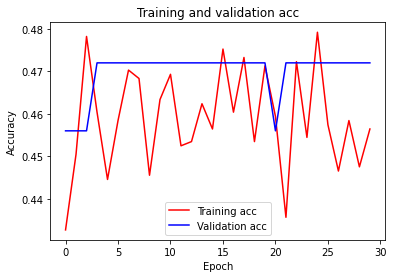

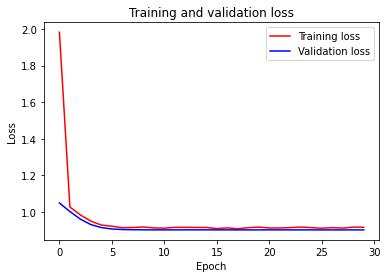

In [18]:
#Graphing our training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')  
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [21]:
#Classification metrics and confussion matrix
print('test data', validation_data)
preds = np.round(model.predict(validation_data),0) 
#to fit them into classification metrics and confusion metrics, some additional modificaitions are required
print('rounded test_labels', preds)

test data [[[[-0.2288867  -0.15699404 -0.25636157 ... -0.17916447 -0.1574288
     0.05025467]
   [-0.13782808 -0.14610639 -0.24568838 ... -0.18841375 -0.1182506
    -0.173444  ]
   [-0.1519777  -0.13176556 -0.23655039 ... -0.18301189 -0.11452673
    -0.18414171]
   [-0.21915993 -0.10761867 -0.277967   ... -0.1458147  -0.11838912
     0.0145505 ]]

  [[-0.19227771 -0.1545389  -0.22552907 ... -0.16610506 -0.10441013
    -0.04382504]
   [-0.11147462 -0.10888454 -0.2595915  ... -0.16838016 -0.06847393
    -0.27372515]
   [-0.14011084 -0.11838797 -0.22947544 ... -0.1689373  -0.07485317
    -0.26298523]
   [-0.2385255  -0.14703296 -0.23225825 ... -0.15223932 -0.09520718
     0.1195093 ]]

  [[-0.18524304 -0.15797202 -0.23400615 ... -0.1721784  -0.10978294
    -0.01152016]
   [-0.11514559 -0.11201268 -0.2720128  ... -0.17586082 -0.07367705
    -0.2673586 ]
   [-0.12493485 -0.10431827 -0.27794266 ... -0.1612163  -0.07349952
    -0.27804896]
   [-0.22822782 -0.13142541 -0.25507978 ... -0.148809

In [22]:
#Model evaluation on testing set
model.evaluate(test_data, test_labels)

5/5 [==============================] - 0s 7ms/step - loss: 0.9257 - acc: 0.4651


[0.9257266521453857, 0.4651162922382355]

In [23]:
plants = ['Healthy', 'Leaf_Rust', 'Septoria']
classification_metrics = metrics.classification_report(validation_labels, preds, target_names=plants )
print(classification_metrics)

              precision    recall  f1-score   support

     Healthy       0.00      0.00      0.00        59
   Leaf_Rust       0.00      0.00      0.00        57
    Septoria       0.00      0.00      0.00         9

   micro avg       0.00      0.00      0.00       125
   macro avg       0.00      0.00      0.00       125
weighted avg       0.00      0.00      0.00       125
 samples avg       0.00      0.00      0.00       125



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
#Testing image on a model

def read_image(file_path):
    print("[INFO] loading and preprocessing image...")  
    image = load_img(file_path, target_size=(150, 150))  
    image = img_to_array(image)  
    image = np.expand_dims(image, axis=0)
    image /= 255.  
    return image

In [25]:
def test_single_image(path):
    images = read_image(path)
    time.sleep(.5)
    bt_prediction = efficient.predict(images)  
    preds = model.predict_proba(bt_prediction)
    for idx, plant, x in zip(range(0,3), plants , preds[0]):
        print("ID: {}, Label: {} {}%".format(idx, plant, round(x*100,2) ))
    print('Final Decision:')
    time.sleep(.5)
    for x in range(3):
        print('.'*(x+1))
        time.sleep(.2)
    class_predicted = model.predict_classes(bt_prediction)
    class_dictionary = generator_top.class_indices  
    inv_map = {v: k for k, v in class_dictionary.items()}  
    print("ID: {}, Label: {}".format(class_predicted[0], inv_map[class_predicted[0]]))  
    return load_img(path)

In [26]:
path1=r'/content/drive/MyDrive/Hawi/output/test/Leaf_Rust/lolr(11).JPG'


In [27]:
test_single_image(path1)

Output hidden; open in https://colab.research.google.com to view.